In [ ]:

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.metrics import accuracy_score, classification_report 
from termcolor import colored 

In [ ]:
loan_data = pd.read_csv("F:/Projects/Loan_Prediction/dataset.csv.")

In [3]:
print("The shape =", loan_data.shape)
num_rows, num_cols = loan_data.shape
num_features = num_cols - 1
num_data = num_rows * num_cols
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")
print(f"Number of Features: {num_features}")
print(f"Number of All Data: {num_data}")

The shape = (614, 13)
Number of Rows: 614
Number of Columns: 13
Number of Features: 12
Number of All Data: 7982


In [4]:
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [5]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
loan_data.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64


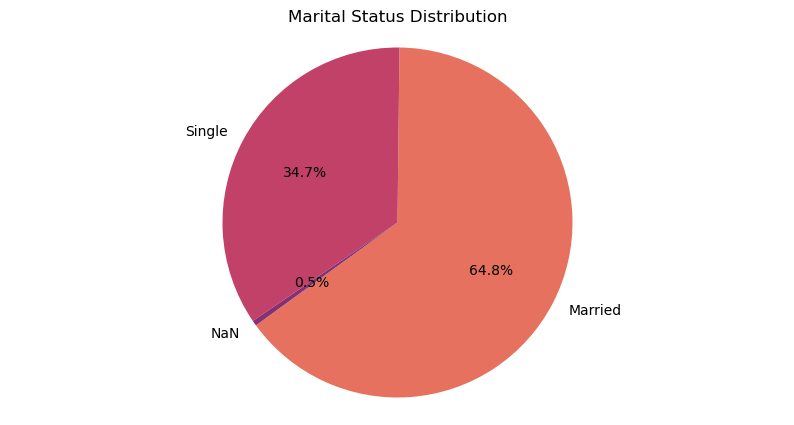

In [7]:
MarriedAnalysis = loan_data.Married.value_counts(dropna=False)
print(MarriedAnalysis)

plt.figure(figsize=(10, 5))


plt.pie(MarriedAnalysis,
        labels=[("Married"),("Single"),("NaN")],
        startangle=216,
        autopct='%1.1f%%',
        colors=sns.color_palette("flare",
        len(MarriedAnalysis)))

plt.axis('equal')
plt.title('Marital Status Distribution')
plt.show()

Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64


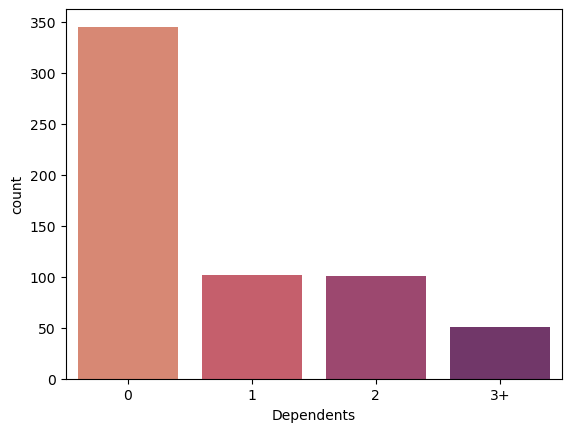

In [8]:

DependentsAnalysis = loan_data.Dependents.value_counts(dropna=False)
print(DependentsAnalysis)

sns.countplot(x="Dependents", data=loan_data, palette="flare")
plt.show()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


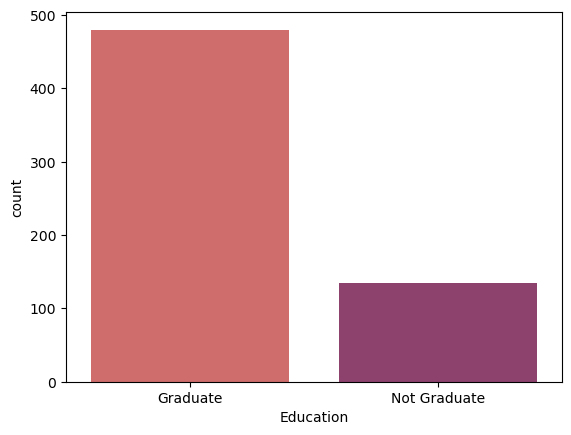

In [9]:

EducationAnalysis = loan_data.Education.value_counts(dropna=False)
print(EducationAnalysis)

sns.countplot(x="Education", data=loan_data, palette="flare")
plt.show()

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64


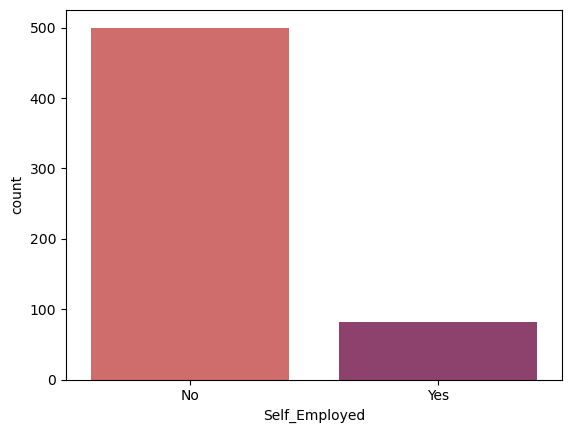

In [10]:

Self_EmployedAnalysis = loan_data.Self_Employed.value_counts(dropna=False)
print(Self_EmployedAnalysis)

sns.countplot(x="Self_Employed", data=loan_data, palette="flare")
plt.show()

The Average Income: 5403.46 
The ratio of people with income above average to below average: 40.18 
Number of people income above the average: 176
Number of people income below the average: 438


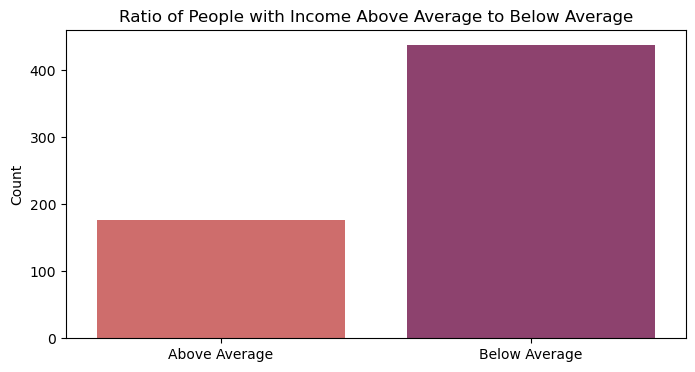

In [11]:

average_income = loan_data['ApplicantIncome'].mean()
print(f"The Average Income: {average_income:.2f} ")


above_average_count = (loan_data['ApplicantIncome'] > average_income).sum()
below_average_count = (loan_data['ApplicantIncome'] <= average_income).sum()

ratio = above_average_count / below_average_count
print(f"The ratio of people with income above average to below average: {ratio*100:.2f} ")
print(f"Number of people income above the average: {above_average_count}")
print(f"Number of people income below the average: {below_average_count}")

plt.figure(figsize=(8, 4))
sns.barplot(x=['Above Average', 'Below Average'], y=[above_average_count, below_average_count], palette="flare")
plt.title('Ratio of People with Income Above Average to Below Average')
plt.ylabel('Count')
plt.show()

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64


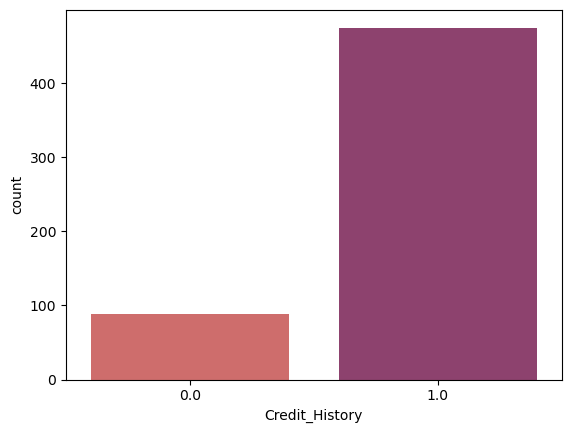

In [12]:

Credit_HistoryAnalysis = loan_data.Credit_History.value_counts(dropna=False)
print(Credit_HistoryAnalysis)


sns.countplot(x="Credit_History", data=loan_data, palette="flare")
plt.show()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


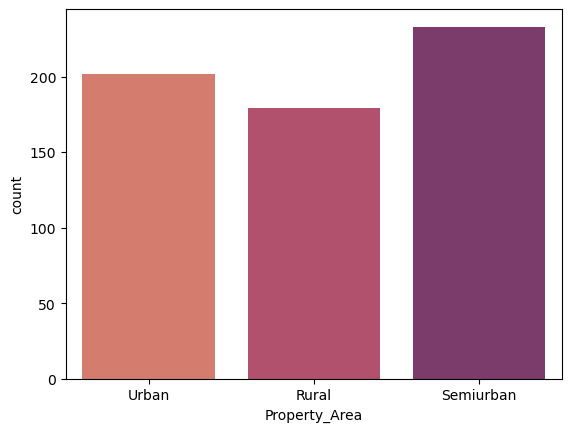

In [13]:

Property_AreaAnalysis = loan_data.Property_Area.value_counts(dropna=False)
print(Property_AreaAnalysis)


sns.countplot(x="Property_Area", data=loan_data, palette="flare")
plt.show()

Loan_Status
Y    422
N    192
Name: count, dtype: int64


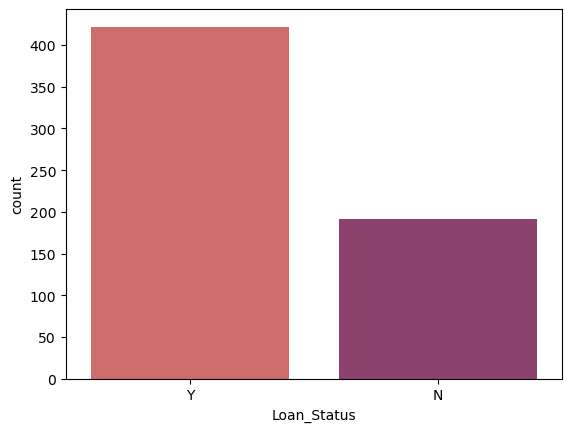

In [14]:

Loan_StatusAnalysis = loan_data.Loan_Status.value_counts(dropna=False)
print(Loan_StatusAnalysis)


sns.countplot(x="Loan_Status", data=loan_data, palette="flare")
plt.show()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


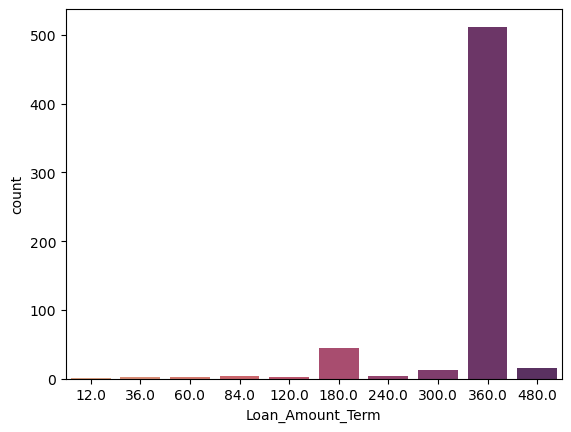

In [15]:

Loan_Amount_TermAnalysis = loan_data.Loan_Amount_Term.value_counts(dropna=False)
print(Loan_Amount_TermAnalysis)

sns.countplot(x="Loan_Amount_Term", data=loan_data, palette="flare")
plt.show()

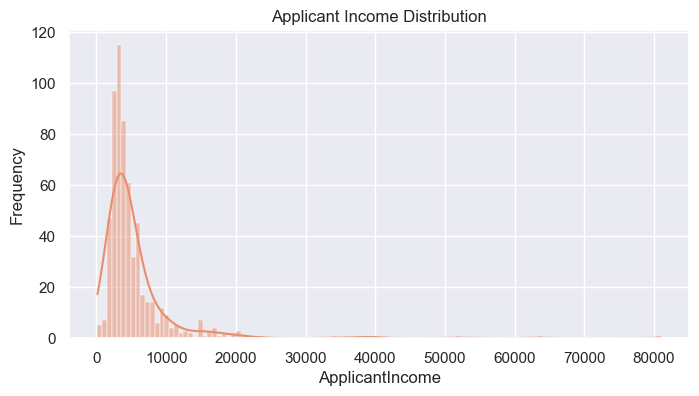

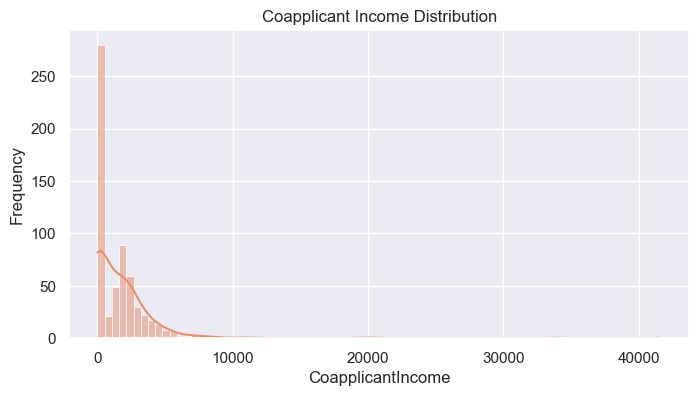

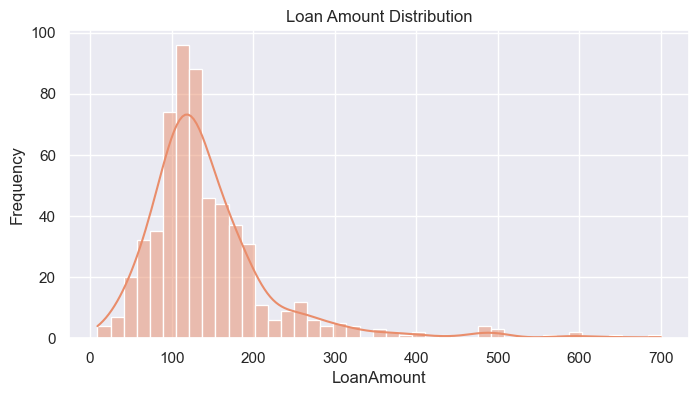

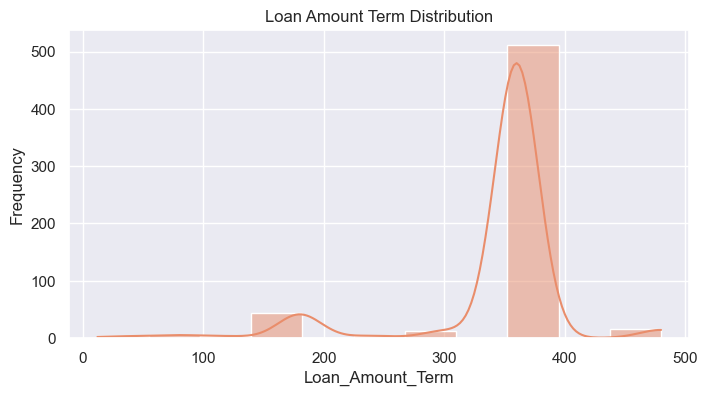

In [16]:
sns.set_theme(palette="flare")
def plot_distribution(column, title):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=loan_data, x=column, kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

plot_distribution("ApplicantIncome", "Applicant Income Distribution")
plot_distribution("CoapplicantIncome", "Coapplicant Income Distribution")
plot_distribution("LoanAmount", "Loan Amount Distribution")
plot_distribution("Loan_Amount_Term", "Loan Amount Term Distribution")

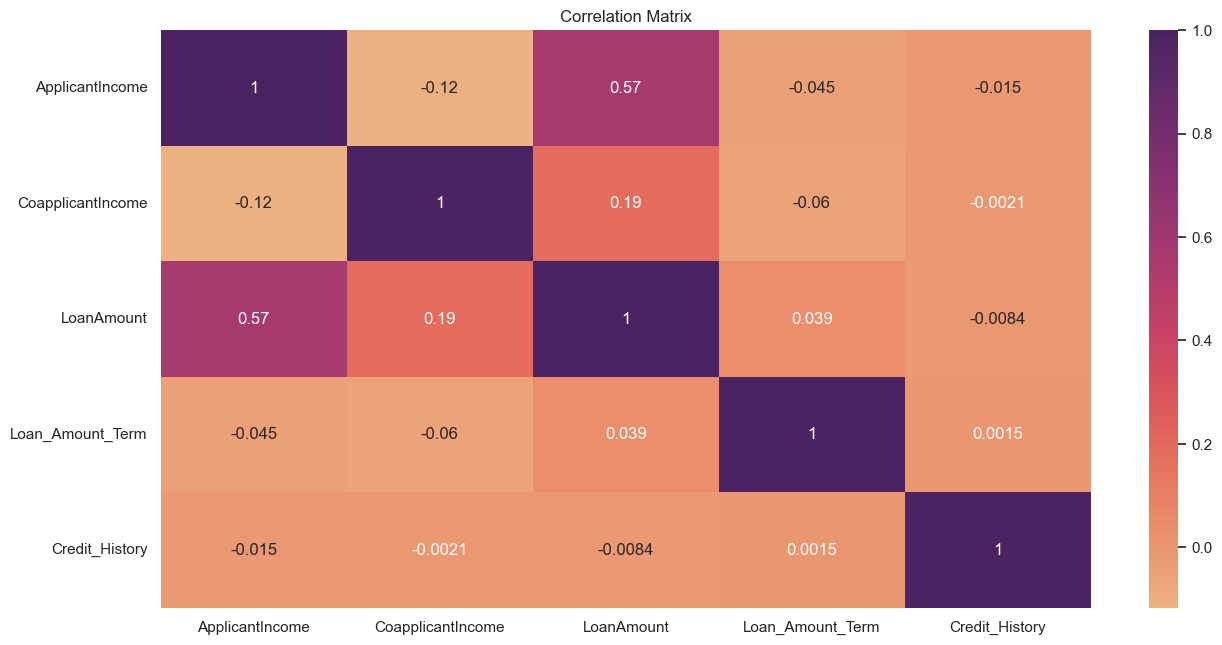

In [17]:

correlation_matrix = loan_data.corr(numeric_only=True)

plt.figure(figsize=(15, 7.5))


sns.heatmap(correlation_matrix, annot=True, cmap='flare')

plt.title('Correlation Matrix')

plt.show()

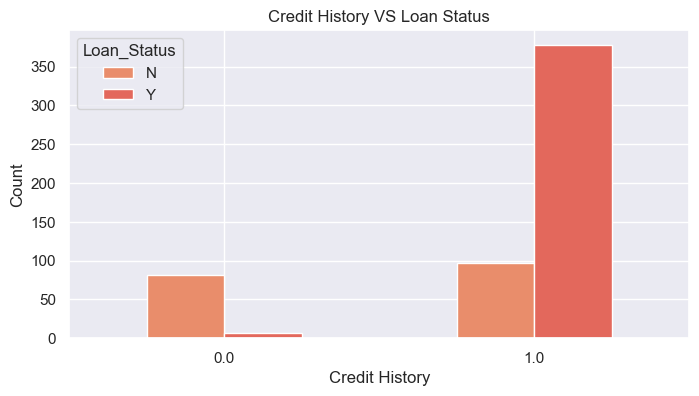

In [18]:

pd.crosstab(loan_data.Credit_History, loan_data.Loan_Status).plot(kind="bar", figsize=(8, 4))

plt.title('Credit History VS Loan Status')

plt.xlabel('Credit History')

plt.ylabel('Count')

plt.xticks(rotation=0)

plt.show()

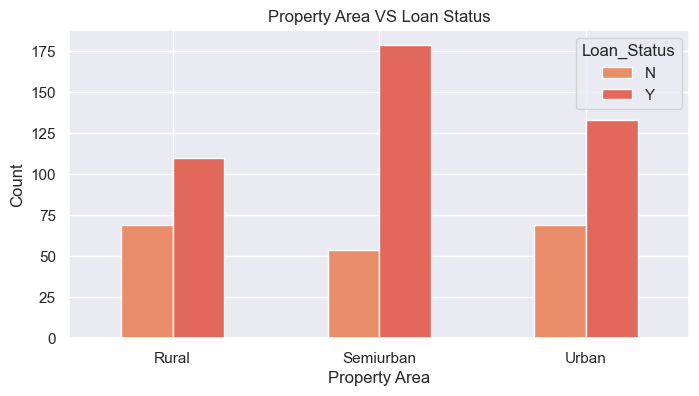

In [19]:
pd.crosstab(loan_data.Property_Area, loan_data.Loan_Status).plot(kind="bar", figsize=(8, 4))

plt.title('Property Area VS Loan Status')

plt.xlabel('Property Area')

plt.ylabel('Count')

plt.xticks(rotation=0)

plt.show()

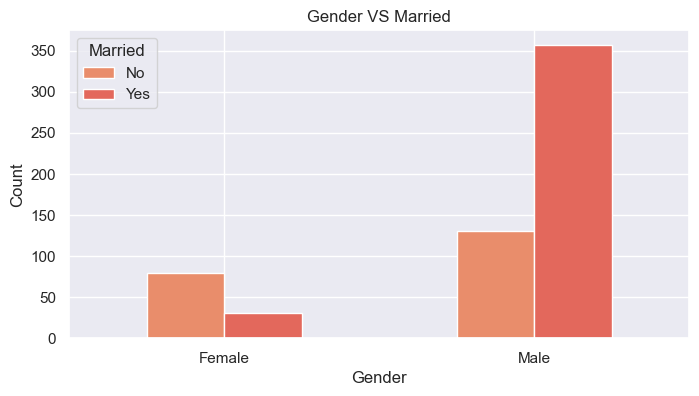

In [20]:
pd.crosstab(loan_data.Gender, loan_data.Married).plot(kind="bar", figsize=(8, 4))

plt.title('Gender VS Married')

plt.xlabel('Gender')

plt.ylabel('Count')

plt.xticks(rotation=0)

plt.show()

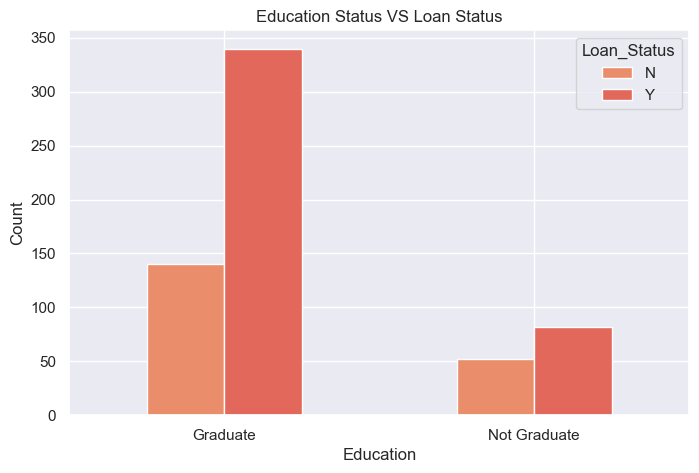

In [21]:
pd.crosstab(loan_data.Education, loan_data.Loan_Status).plot(kind="bar", figsize=(8, 5))
plt.title('Education Status VS Loan Status')

plt.xlabel('Education')

plt.ylabel('Count')

plt.xticks(rotation=0)

plt.show()

In [22]:

loan_data.drop(['Loan_ID'], axis = 1 , inplace = True)

In [23]:

null_counts = loan_data.isnull().sum()

print(null_counts)


Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [24]:
loan_data["Credit_History"] = loan_data["Credit_History"].fillna(loan_data["Credit_History"].mode()[0])
loan_data["LoanAmount"] = loan_data["LoanAmount"].fillna(loan_data["LoanAmount"].mean())
loan_data["Loan_Amount_Term"] = loan_data["Loan_Amount_Term"].fillna(loan_data["Loan_Amount_Term"].mode()[0])

loan_data["Gender"] = loan_data["Gender"].fillna(loan_data["Gender"].mode()[0])
loan_data["Married"] = loan_data["Married"].fillna(loan_data["Married"].mode()[0])
loan_data["Dependents"] = loan_data["Dependents"].fillna(loan_data["Dependents"].mode()[0])
loan_data["Self_Employed"] = loan_data["Self_Employed"].fillna(loan_data["Self_Employed"].mode()[0])

In [25]:

null_counts = loan_data.isnull().sum()

print(null_counts)


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [26]:

loan_data = pd.get_dummies(loan_data)
loan_data = loan_data.drop(['Gender_Female',
                            'Married_No',
                            'Education_Not Graduate',
                            'Self_Employed_No',
                            'Loan_Status_N'], axis = 1) 

newColunmsNames = {'Gender_Male': 'Gender',
                   'Married_Yes': 'Married',
                   'Education_Graduate': 'Education',
                   'Self_Employed_Yes': 'Self_Employed',
                   'Loan_Status_Y': 'Loan_Status'}


loan_data.rename(columns=newColunmsNames, inplace=True)

column_names = loan_data.columns.tolist()

print(colored("Column Names:", "blue",attrs=['reverse']))

for col in column_names:
    print(f"- {col}")

print("The shape =",loan_data.shape)

Column Names:
- ApplicantIncome
- CoapplicantIncome
- LoanAmount
- Loan_Amount_Term
- Credit_History
- Gender
- Married
- Dependents_0
- Dependents_1
- Dependents_2
- Dependents_3+
- Education
- Self_Employed
- Property_Area_Rural
- Property_Area_Semiurban
- Property_Area_Urban
- Loan_Status
The shape = (614, 17)


C:\Users\ADMIN\Downloads\Anaconda\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)


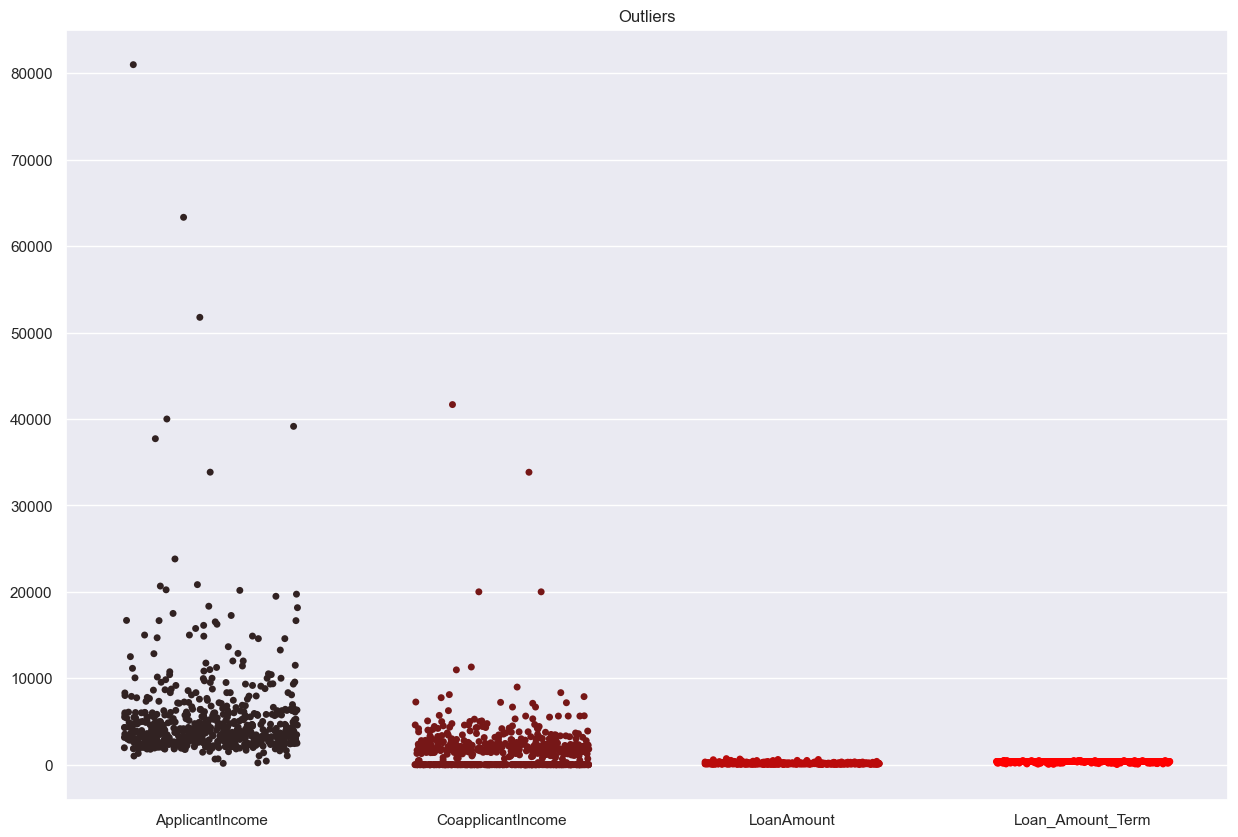

In [27]:

plt.figure(figsize=(15, 10))


outliersColumns = loan_data.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])


sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)

plt.title("Outliers")

plt.show()

In [28]:
##IQR scaling
Q1 = loan_data.astype(np.float32).quantile(0.25)
Q3 = loan_data.astype(np.float32).quantile(0.75)

IQR = Q3 - Q1

loan_data = loan_data[~((loan_data < (Q1 - 1.5 * IQR)) |(loan_data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [29]:
# Square Root Transformation - to normalized the distribution.
loan_data.ApplicantIncome = np.sqrt(loan_data.ApplicantIncome)
loan_data.CoapplicantIncome = np.sqrt(loan_data.CoapplicantIncome)
loan_data.LoanAmount = np.sqrt(loan_data.LoanAmount)

print(loan_data.shape)
print(colored("We will see the distribution after Scaling","red", attrs=["reverse"]))

(136, 17)
We will see the distribution after Scaling


C:\Users\ADMIN\Downloads\Anaconda\Lib\site-packages\seaborn\categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:red'` for same effect.
  warnings.warn(msg, FutureWarning)


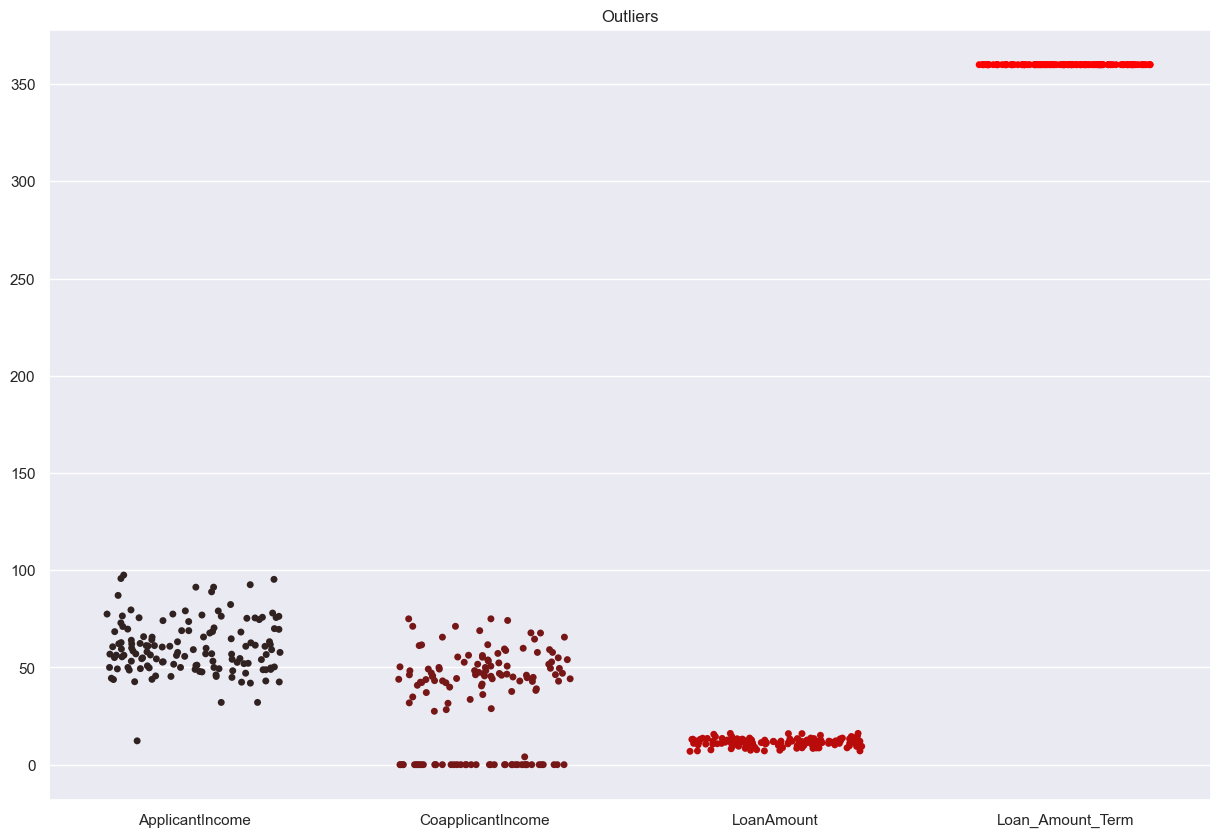

In [30]:

plt.figure(figsize=(15, 10))


outliersColumns = loan_data.get(["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"])

sns.stripplot(data=outliersColumns, color="red", jitter=0.3, size=5)

plt.title("Outliers")

plt.show()

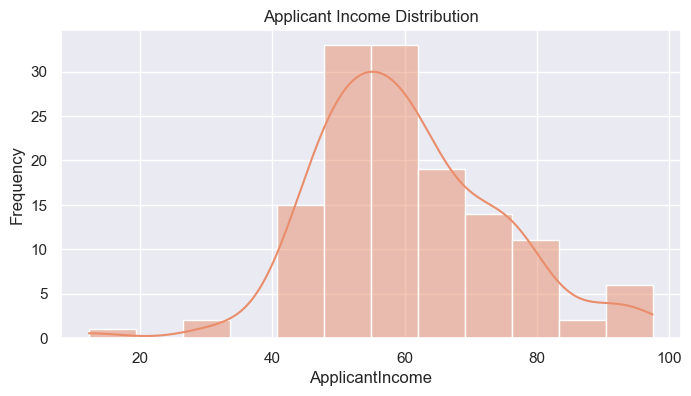

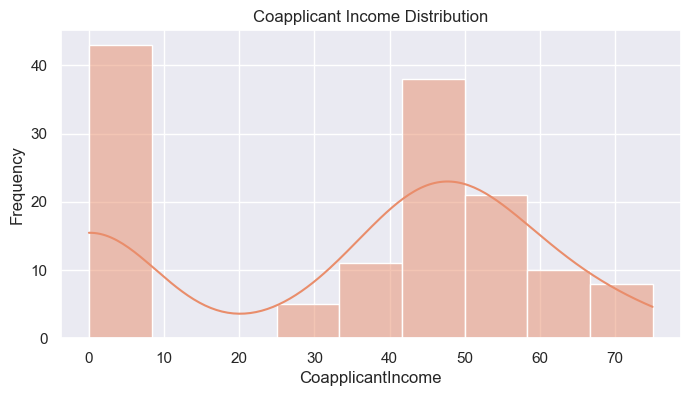

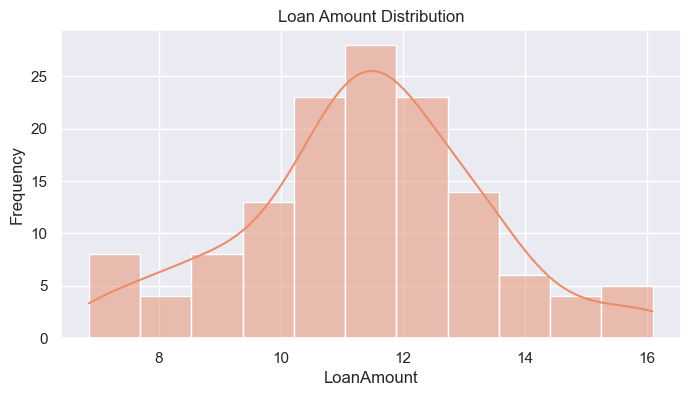

In [31]:

sns.set_theme(palette="flare")

def plot_distribution(column, title):
    plt.figure(figsize=(8, 4))
    sns.histplot(data=loan_data, x=column, kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

plot_distribution("ApplicantIncome", "Applicant Income Distribution")
plot_distribution("CoapplicantIncome", "Coapplicant Income Distribution")
plot_distribution("LoanAmount", "Loan Amount Distribution")

In [32]:

columns_to_check = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for column_name in columns_to_check:

    duplicate_count = loan_data[column_name].duplicated().sum()

    if duplicate_count == 0:
        print(colored(f"No duplicate entries found in the {column_name} column.", "green", attrs=['reverse']))
    else:
        print(colored(f"Number of duplicate entries found in the {column_name} column: {duplicate_count}", "cyan", attrs=['bold']))

Number of duplicate entries found in the ApplicantIncome column: 10
Number of duplicate entries found in the CoapplicantIncome column: 45
Number of duplicate entries found in the LoanAmount column: 57
Number of duplicate entries found in the Loan_Amount_Term column: 135
Number of duplicate entries found in the Credit_History column: 135


In [33]:
#Model Building
X = loan_data.drop(columns=['Loan_Status'])

Y = loan_data['Loan_Status']

In [34]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [35]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)


Shape of X_train: (108, 16)
Shape of X_test: (28, 16)
Shape of Y_train: (108,)
Shape of Y_test: (28,)


In [50]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB,BernoulliNB 
from sklearn.linear_model import RidgeClassifierCV
from sklearn.svm import SVC  
from sklearn.ensemble import GradientBoostingClassifier  

In [37]:
scoreListDT_Train = []
scoreListDT_Test = []

for i in range(1, 20):

    for j in range(1, 5):

        Model1 = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j, max_features=2)

        Model1.fit(X_train, Y_train)

        scoreListDT_Train.append(Model1.score(X_train, Y_train))

        scoreListDT_Test.append(Model1.score(X_test, Y_test))

DT_Accuracy_Train = max(scoreListDT_Train)
DT_Accuracy_Test = max(scoreListDT_Test)

print(f"Decision Tree best accuracy (Training): {DT_Accuracy_Train*100:.2f}%")
print(f"Decision Tree best accuracy (Testing): {DT_Accuracy_Test*100:.2f}%")

Decision Tree best accuracy (Training): 100.00%
Decision Tree best accuracy (Testing): 92.86%


In [38]:
scoreListRF_Train = []
scoreListRF_Test = []

for max_dep in range(1, 10):

    for rand_state in range(1, 50):

        for n_est in range(1, 30):

            Model2 = RandomForestClassifier(n_estimators=n_est, random_state=rand_state, max_depth=max_dep)

            Model2.fit(X_train, Y_train)

            scoreListRF_Train.append(Model2.score(X_train, Y_train))

            scoreListRF_Test.append(Model2.score(X_test, Y_test))

RF_Accuracy_Train = max(scoreListRF_Train)
RF_Accuracy_Test = max(scoreListRF_Test)

print(f"Random Forest best accuracy (Training): {RF_Accuracy_Train*100:.2f}%")
print(f"Random Forest best accuracy (Testing): {RF_Accuracy_Test*100:.2f}%")

Random Forest best accuracy (Training): 100.00%
Random Forest best accuracy (Testing): 96.43%


In [39]:
scoreListGNB_Train = []
scoreListGNB_Test = []

for i in range(1, 9):

    Model3_1 = GaussianNB(var_smoothing=10**(-i))

    Model3_1.fit(X_train, Y_train)

    scoreListGNB_Train.append(Model3_1.score(X_train, Y_train))

    scoreListGNB_Test.append(Model3_1.score(X_test, Y_test))

GNB_Accuracy_Train = max(scoreListGNB_Train)
GNB_Accuracy_Test = max(scoreListGNB_Test)

print(f"Gaussian Naive Bayes best accuracy (Training): {GNB_Accuracy_Train*100:.2f}%")
print(f"Gaussian Naive Bayes best accuracy (Testing): {GNB_Accuracy_Test*100:.2f}%")

Gaussian Naive Bayes best accuracy (Training): 79.63%
Gaussian Naive Bayes best accuracy (Testing): 89.29%


In [40]:
Model3_2= BernoulliNB()

Model3_2.fit(X_train, Y_train)

BNB_Accuracy_Train = Model3_2.score(X_train, Y_train)

BNB_Accuracy_Test = Model3_2.score(X_test, Y_test)

print(f"Bernoulli Naive Bayes best accuracy (Training): {BNB_Accuracy_Train*100:.2f}%")
print(f"Bernoulli Naive Bayes best accuracy (Testing): {BNB_Accuracy_Test*100:.2f}%")

Bernoulli Naive Bayes best accuracy (Training): 80.56%
Bernoulli Naive Bayes best accuracy (Testing): 92.86%


In [46]:
Model4= RidgeClassifierCV()
Model4.fit(X_train,Y_train)
RCCV_Accuracy_Train = Model4.score(X_train, Y_train)
RCCV_Accuracy_Test = Model4.score(X_test, Y_test)

print(f"Ridge Classifier CV best accuracy (Training): {RCCV_Accuracy_Train*100:.2f}%")
print(f"Ridge Classifier CV best accuracy (Testing): {RCCV_Accuracy_Test*100:.2f}%")

Ridge Classifier CV best accuracy (Training): 79.63%
Ridge Classifier CV best accuracy (Testing): 92.86%


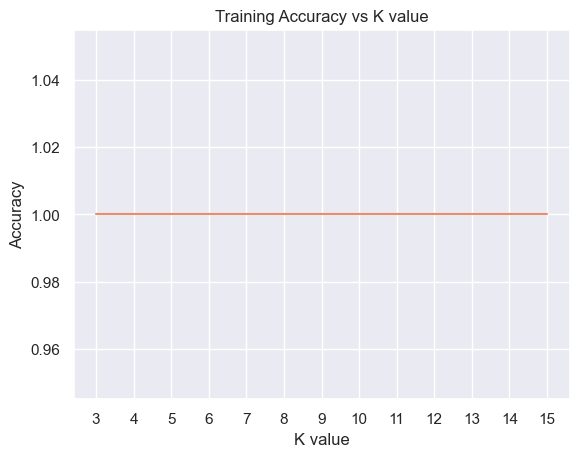

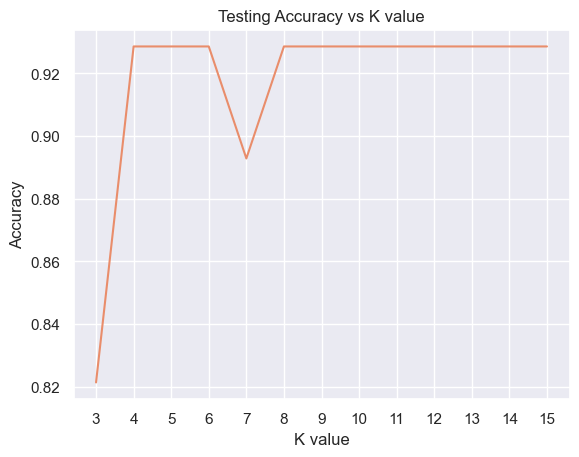

KNN best accuracy (Training): 100.00%
KNN best accuracy (Testing): 92.86%


In [47]:

scoreListknn_Train = []
scoreListknn_Test = []

for i in range(3, 16):
    Model5 = KNeighborsClassifier(n_neighbors=i, weights='distance')
    Model5.fit(X_train, Y_train)
    scoreListknn_Train.append(Model5.score(X_train, Y_train))
    scoreListknn_Test.append(Model5.score(X_test, Y_test))

plt.plot(range(3, 16), scoreListknn_Train)
plt.xticks(np.arange(3, 16, 1))
plt.title("Training Accuracy vs K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

plt.plot(range(3, 16), scoreListknn_Test)
plt.xticks(np.arange(3, 16, 1))
plt.title("Testing Accuracy vs K value")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.show()

KNN_Accuracy_Train = max(scoreListknn_Train)
KNN_Accuracy_Test = max(scoreListknn_Test)

print(f"KNN best accuracy (Training): {KNN_Accuracy_Train*100:.2f}%")
print(f"KNN best accuracy (Testing): {KNN_Accuracy_Test*100:.2f}%")

In [48]:
model_train_scores = {
    "Model 1-Decision Tree Classifier": DT_Accuracy_Train,
    "Model 2-Random Forest Classifier": RF_Accuracy_Train,
    "Model 3-GaussianNB": GNB_Accuracy_Train,
    "Model 3-BernoulliNB": BNB_Accuracy_Train,
    "Model 4-Ridge Classifier CV": RCCV_Accuracy_Train,
    "Model 5-K-Nearest Neighbors (KNN)": KNN_Accuracy_Train
}

for model_name, accuracy in model_train_scores.items():
    print(colored(f"{model_name:<50} Training Score: {accuracy*100}", "green"))

Model 1-Decision Tree Classifier                   Training Score: 100.0
Model 2-Random Forest Classifier                   Training Score: 100.0
Model 3-GaussianNB                                 Training Score: 79.62962962962963
Model 3-BernoulliNB                                Training Score: 80.55555555555556
Model 4-Ridge Classifier CV                        Training Score: 79.62962962962963
Model 5-K-Nearest Neighbors (KNN)                  Training Score: 100.0


In [49]:
model_test_scores = {
    "Model 1-Decision Tree Classifier": DT_Accuracy_Test,
    "Model 2-Random Forest Classifier": RF_Accuracy_Test,
    "Model 3-GaussianNB": GNB_Accuracy_Test,
    "Model 3-BernoulliNB": BNB_Accuracy_Test,
    "Model 4-Ridge Classifier CV": RCCV_Accuracy_Test,
    "Model 5-K-Nearest Neighbors (KNN)": KNN_Accuracy_Test
}

for model_name, accuracy in model_test_scores.items():
    print(colored(f"{model_name:<50} Testing Score: {accuracy*100}", "green"))

Model 1-Decision Tree Classifier                   Testing Score: 92.85714285714286
Model 2-Random Forest Classifier                   Testing Score: 96.42857142857143
Model 3-GaussianNB                                 Testing Score: 89.28571428571429
Model 3-BernoulliNB                                Testing Score: 92.85714285714286
Model 4-Ridge Classifier CV                        Testing Score: 92.85714285714286
Model 5-K-Nearest Neighbors (KNN)                  Testing Score: 92.85714285714286
